## Chapter 2: An End-to-End Machine Learning Project

In this notebook, we will go through an end-to-end example project, pretending to be a recently hired data scientist in a real estate company. Here are the main steps we will go through:

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune the model.
7. Present the solution.
8. Launch, monitor, and maintain the system.

### 1. Look at the big picture

For this project, we are asked to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Buearu publishes sample data (a block group typically has a population of 600 to 3000 people). The model should learn from this data and be able to predict the median housing price in any district, given all the other metrics. This model will be used as a factor to determine whether it is worth investing in a given area or not.

**Frame the problem**

1. Define the project objective.
2. How will the solution be used?
3. What are the current solutions?
4. What type of Machine Learning is needed?
5. How should performance be measured?


### 2. Get the data

In typical environments your data would be available in a relational database and spread across multiple tables/documents/files. To access it, you would first need to get your credentials and access authorizations. 

In this project, the data can be simply downloaded from 

"https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"

Extract *housing.csv* from the tgz file, then load the file as a pandas DataFrame.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
housing = pd.read_csv(os.getcwd() + '/Data/CaliforniaHousing/housing.csv')

### 3. Explore the data

1. Display the top five rows using the head() method. Learn the attributes in the data.
2. Get a quick description of the data using the info() method. Learn the total number of rows, each attribute's type, and number of non-null values.
3. Display the frequencies of categorial attributes using the value_counts() method.
4. Display a summary of numerical attributes using the describe() method.
5. Plot historgrams for each numerical attribute to get a feel of its distribution.

In [3]:
housing.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41,21,52,52,52
total_rooms,880,7099,1467,1274,1627
total_bedrooms,129,1106,190,235,280
population,322,2401,496,558,565
households,126,1138,177,219,259
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600,358500,352100,341300,342200
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.ocean_proximity.value_counts()
# housing['ocean_proximity']

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


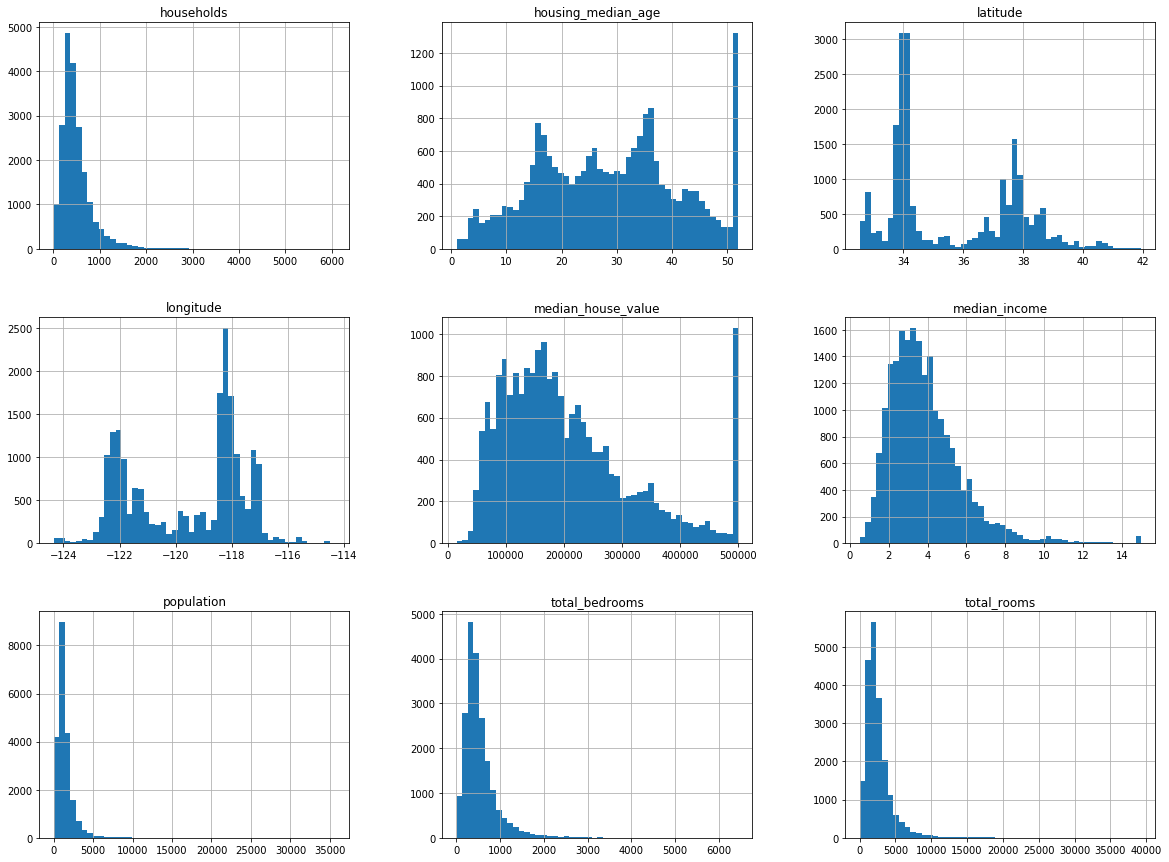

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Have you noticed these things?
1. There are 207 missing values for attribute total_bedrooms.
1. The median income attribute does not look like it is expressed in US dollars.
2. The housing median age and the median house value are capped.
3. These attributes have very different scales.
4. Most attributes are right-skewed.

### Visualizing Geographical Data


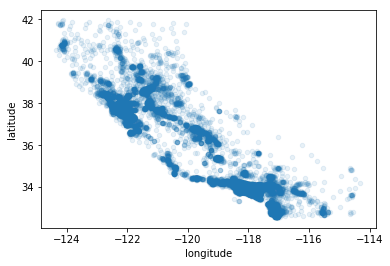

In [9]:
# 1. scatter plot of geographical data
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

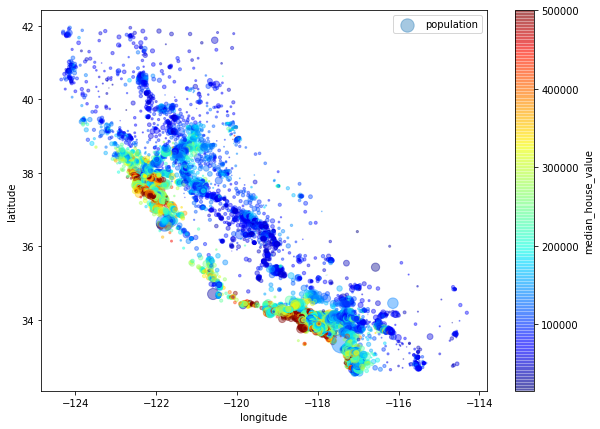

In [10]:
# 2. scatter plot with colors indicating house values
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             alpha=0.4,
             s=housing["population"]/100,
             label="population",
             figsize=(10,7),
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True,
             sharex=False)
plt.legend()

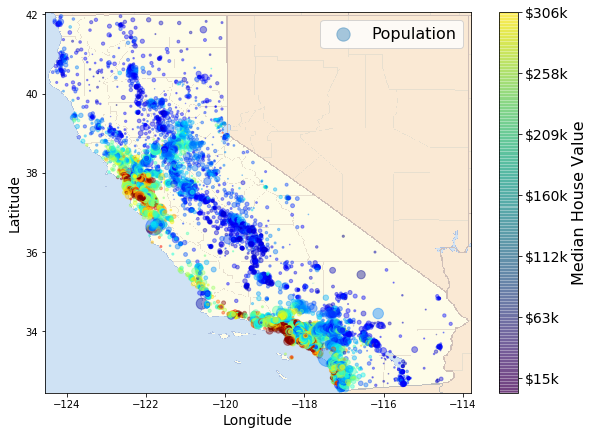

In [11]:
# This cell requires california.png file downloaded
# from textbook GitHub repository

# scatter plot on California map
import matplotlib.image as mpimg
import numpy as np
california_img=mpimg.imread('Data/CaliforniaHousing/california.png')
ax = housing.plot(kind="scatter",
                  x="longitude",
                  y="latitude",
                  figsize=(10,7),
                  s=housing['population']/100,
                  label="Population",
                  c="median_house_value",
                  cmap=plt.get_cmap("jet"),
                  colorbar=False,
                  alpha=0.4)
plt.imshow(california_img,
           extent=[-124.55, -113.80, 32.45, 42.05],
           alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) \
                         for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Correlation between attributes

1. Use .corr() to display the standard correlation coefficient between median house value and each input feature.
2. Use pandas.plotting.scatter_matrix() to visualize the correlation.

- Correlation coefficient ranges from -1 to 1.
- When it is close to 1, it means that there is a strong positive correlation.
- When it is close to -1, it means that there is a strong negative correlation.
- When it is close to zero, it means that there is no *linear* correlation (other correlation may still exist

In [12]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

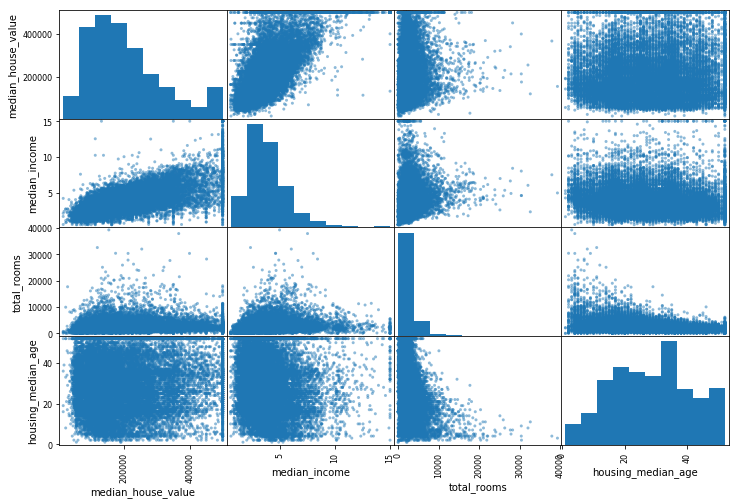

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

### Experimenting with combinations of attributes

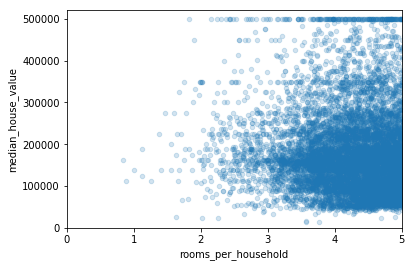

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


In [14]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()
print(housing.corr()['median_house_value'].sort_values(ascending=False))

### 4. Prepare the data for Machine Learning algorithms


1. Impute missing values with median (use sklearn.preprocessing.Imputer).
2. Convert categorical attributes to numerical attributes (use sklearn.preprocessing.OneHotEncoder).
3. Add extra useful attributes (customized transformer)
4. Feature scaling: use sklearn.preprocessing.StandardScaler to scale attributes to zero mean and unit variation.
5. Split the data into training set and test set. (Should we use purely randomized splitting?)

**Question**
- Should we use simple random sampling to obtain test data?
- Should we use the entire dataset to build feature scaler?

In [15]:
# Impute total_bedrooms with median value
# median = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median, inplace=True)

from sklearn.preprocessing import Imputer
housing_num = housing.drop('ocean_proximity', axis=1)
housing_num_columns = housing_num.columns
housing_cat = housing['ocean_proximity']
imputer = Imputer(strategy='median')
imputer.fit(housing_num)
print('median values:', housing_num.median().values)
print('imputer statistics:', imputer.statistics_)
housing_num = imputer.transform(housing_num)
housing_num = pd.DataFrame(housing_num,
                           columns=housing_num_columns)
housing_num.info()

median values: [-1.18490000e+02  3.42600000e+01  2.90000000e+01  2.12700000e+03
  4.35000000e+02  1.16600000e+03  4.09000000e+02  3.53480000e+00
  1.79700000e+05  5.22912879e+00  2.03162434e-01  2.81811565e+00]
imputer statistics: [-1.18490000e+02  3.42600000e+01  2.90000000e+01  2.12700000e+03
  4.35000000e+02  1.16600000e+03  4.09000000e+02  3.53480000e+00
  1.79700000e+05  5.22912879e+00  2.03162434e-01  2.81811565e+00]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
rooms

In [16]:
# Preprocess categorical feature 'ocean_proximity'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_encoded, housing_categories = housing_cat.factorize()
print('housing_categories:', housing_categories)
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
print(housing_cat_1hot.toarray()[:5])

housing_cat = pd.DataFrame(housing_cat_1hot.toarray(),
                           columns=housing_categories)
housing_cat.head()

housing_categories: Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [17]:
# create a custom transformer to add extra attributes: 
# 1. rooms_per_household
# 2. population_per_household
# 3. (optional) bedrooms_per_room
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, bedrooms_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,
                         rooms_per_household,
                         population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X,
                         rooms_per_household,
                         population_per_household]

# apply the above class to add extra attributes
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_num.values)

# convert it to a dataframe
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
                                     columns=list(housing_num.columns)+['rooms_per_household',
                                                                    'population_per_household',
                                                                    ])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,6.281853,1.081081


In [18]:
# Feature Scaling
housing_prepared = pd.concat([housing_extra_attribs, housing_cat], axis=1)
housing_prepared_columns = housing_prepared.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_prepared = scaler.fit_transform(housing_prepared)
housing_prepared = pd.DataFrame(housing_prepared,
                            columns=housing_prepared_columns)
print('shape:', housing_prepared.shape)
housing_prepared.head()

shape: (20640, 19)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-1.149930,-0.049597,0.628559,-0.148514,2.830742,-0.891156,-0.681889,-0.384466,-0.015566
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.990381,-0.092512,0.327041,-0.248542,2.830742,-0.891156,-0.681889,-0.384466,-0.015566
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-1.445865,-0.025843,1.155620,-0.052902,2.830742,-0.891156,-0.681889,-0.384466,-0.015566
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.493627,-0.050329,0.156966,-0.053647,2.830742,-0.891156,-0.681889,-0.384466,-0.015566
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.707889,-0.085616,0.344711,-0.038196,2.830742,-0.891156,-0.681889,-0.384466,-0.015566


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
housing_train, housing_test = train_test_split(housing_prepared,
                                               test_size=0.2,
                                               random_state=1)
print('training set:', housing_train.shape)
print('test set:', housing_test.shape)
housing_train_labels = housing_train.pop('median_house_value')
housing_test_labels = housing_test.pop('median_house_value')

training set: (16512, 19)
test set: (4128, 19)


### 5. Select and Train a Model

1. Apply a Machine Learning model to the training set.
2. Measure the performance of the model on the test set.

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_train, housing_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
from sklearn.metrics import mean_squared_error

housing_train_predictions = lin_reg.predict(housing_train)
lin_mse = mean_squared_error(housing_train_labels,
                             housing_train_predictions)
print('MSE on training set', lin_mse)

MSE on training set 0.34431759134036605


In [22]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_train_labels,
                              housing_train_predictions)
print('MAE on training set', lin_mae)

MAE on training set 0.4244071132989405


In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_train, housing_train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [24]:
housing_train_predictions = tree_reg.predict(housing_train)
tree_mse = mean_squared_error(housing_train_labels,
                              housing_train_predictions)
print('MSE on training set', tree_mse)

MSE on training set 4.3704552304852514e-14


In [25]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_train, housing_train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
housing_train_predictions = forest_reg.predict(housing_train)
forest_mse = mean_squared_error(housing_train_labels,
                              housing_train_predictions)
print('MSE on training set', forest_mse)

MSE on training set 0.037298735140972795


In [27]:
# Better evaluation using cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,
                         housing_train,
                         housing_train_labels,
                         scoring="neg_mean_squared_error",
                         cv=10)
print('Decision Tree:', scores)

Decision Tree: [-0.37442818 -0.41368624 -0.34982796 -0.34149025 -0.34194336 -0.39375414
 -0.39149486 -0.34865397 -0.38166826 -0.39390504]


In [28]:
scores = cross_val_score(lin_reg,
                         housing_train,
                         housing_train_labels,
                         scoring="neg_mean_squared_error",
                         cv=10)
print('Linear Regression:', scores)

Linear Regression: [-0.3613944  -0.32056123 -0.37759765 -0.36047296 -0.3501779  -0.34484361
 -0.30720824 -0.3380379  -0.34969315 -0.36110611]


In [29]:
scores = cross_val_score(forest_reg,
                         housing_train,
                         housing_train_labels,
                         scoring="neg_mean_squared_error",
                         cv=10)
print('Random Forest:', scores)

Random Forest: [-0.21695242 -0.21337911 -0.19578262 -0.21930648 -0.2026559  -0.21725866
 -0.18473546 -0.21142806 -0.21213122 -0.22103877]


### 6. Fine-Tune the Model
Search for a good combination of hyperparameter values for random forest model.
- Grid search: give a few possible values for each hyperparameter, then try all combinations.
- Random search: select values randomly (efficient when there are a large number of hyperparameters)

**Analyze the best model and its error**
- Does this model make sense?
- Should less important features be dropped?
- Does the model make any typical errors?

**Evaluate the model on test set**
- (transform the test data)
- analyze the performance of the model on test set

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30],
     'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap
    # set as False
    {'bootstrap': [False],
     'n_estimators': [3, 10],
     'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of
# (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(\
                   forest_reg,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=True,
                          )
grid_search.fit(housing_train,
                housing_train_labels)

In [ ]:
# The best hyperparameter combination found:
print('best parameters:', grid_search.best_params_)

# The best model with above parameters
best_model = grid_search.best_estimator_
housing_train_pred = best_model.predict(housing_train)
print('MSE:', mean_squared_error(housing_train_pred,
                                 housing_train_labels))
scores = cross_val_score(best_model,
                          housing_train,
                          housing_train_labels,
                          cv=10,
                          scoring="neg_mean_squared_error")
print(scores)

In [ ]:
# Randomized search
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

params = {'bootstrap': [True, False],
          'n_estimators': randint(2, 30),
          'max_features': randint(2, 10),}

forest_reg = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(\
                   forest_reg,
                   params,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=True,
                                  )
random_search.fit(housing_train,
                  housing_train_labels)

In [ ]:
# The best hyperparameter combination found:
print('best parameters:', random_search.best_params_)

# The best model with above parameters
best_model = random_search.best_estimator_
housing_train_pred = best_model.predict(housing_train)
print('MSE:', mean_squared_error(housing_train_pred,
                                 housing_train_labels))
scores = cross_val_score(best_model,
                          housing_train,
                          housing_train_labels,
                          cv=10,
                          scoring="neg_mean_squared_error")
print(scores)

In [ ]:
# Analyze the best model
feature_importance = best_model.feature_importances_
attributes = housing_train.columns
sorted(zip(feature_importance, attributes),
       reverse=True)


In [ ]:
# Evaluation the model on test set
housing_test_pred = best_model.predict(housing_test)
best_mse = mean_squared_error(housing_test_labels,
                              housing_test_pred)
print('MSE on test set:', best_mse)

### Launch, Monitor, and Maintain the model
- Monitor the live performance of the system
- Retrain the model with new data